All needed imports are done

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.applications.vgg16 import VGG16

from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model

AttributeError: partially initialized module 'pandas' has no attribute 'core' (most likely due to a circular import)

TODO

In [48]:
# Charge model VGC16 with imagenet weights
model_vgc = VGG16(weights='imagenet', include_top=False, input_shape=(224, 150, 3))
for(layer) in model_vgc.layers:
    layer.trainable = False

x = model_vgc.output
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(53, activation='softmax')(x)  

model = Model(inputs=model_vgc.input, outputs=x)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 75, 64)       0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 75, 128)      73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 75, 128)      147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 37, 128)       0   

TODO

In [1]:
folder = 'images/training/labeled/'
from keras.applications.vgg16 import preprocess_input

# Data generator
datagen = ImageDataGenerator(preprocessing_function=preprocess_input, horizontal_flip=True, validation_split=0.2)
train_generator = datagen.flow_from_directory(folder, target_size=(224, 150), batch_size=53, class_mode='categorical', subset='training')
test_generator = datagen.flow_from_directory(folder, target_size=(224, 150), batch_size=53, class_mode='categorical', subset='validation')

2023-05-12 18:23:04.997122: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


KeyboardInterrupt: 

TODO

In [50]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator)
model.save('model_fulldeck_v2.h5')
np.save('history.npy',history.history)

Epoch 1/10
81/81 [==============================] - 15s 175ms/step - loss: 3.4788 - accuracy: 0.2119 - val_loss: 2.2354 - val_accuracy: 0.4123
Epoch 2/10
81/81 [==============================] - 13s 161ms/step - loss: 1.1956 - accuracy: 0.6575 - val_loss: 0.6848 - val_accuracy: 0.8179
Epoch 3/10
81/81 [==============================] - 13s 161ms/step - loss: 0.3268 - accuracy: 0.9178 - val_loss: 0.2680 - val_accuracy: 0.9406
Epoch 4/10
81/81 [==============================] - 13s 162ms/step - loss: 0.1127 - accuracy: 0.9739 - val_loss: 0.1977 - val_accuracy: 0.9453
Epoch 5/10
81/81 [==============================] - 13s 163ms/step - loss: 0.0537 - accuracy: 0.9840 - val_loss: 0.0830 - val_accuracy: 0.9764
Epoch 6/10
81/81 [==============================] - 13s 163ms/step - loss: 0.0284 - accuracy: 0.9925 - val_loss: 0.0917 - val_accuracy: 0.9745
Epoch 7/10
81/81 [==============================] - 13s 163ms/step - loss: 0.0315 - accuracy: 0.9934 - val_loss: 0.1691 - val_accuracy: 0.9679

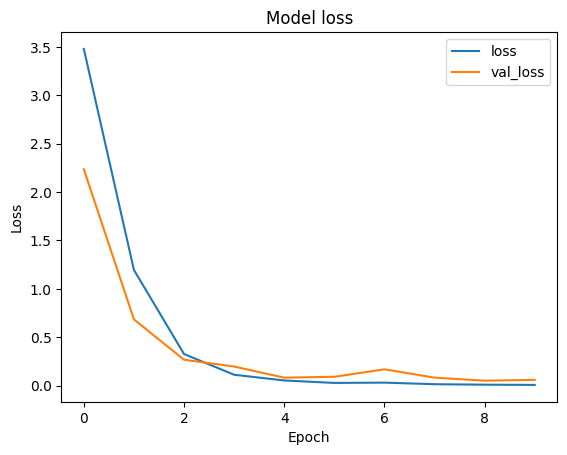

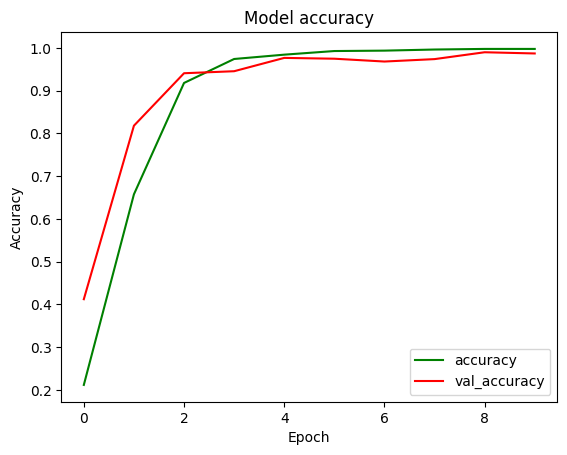

In [51]:
history=np.load('history.npy',allow_pickle=True).item()

# Plot the loss and val_loss
plt.figure(1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')

# Plot the accuracy and val_accuracy
plt.figure(2)
plt.plot(history['accuracy'], color='green')
plt.plot(history['val_accuracy'], color='red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')

# Show the plots
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
import  matplotlib.pyplot as plt

class_list = ['B','C10', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'CA', 'CJ', 'CK', 'CQ', 'D10', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'DA', 'DJ', 'DK', 'DQ', 'H10', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'HA', 'HJ', 'HK', 'HQ', 'S10', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'SA', 'SJ', 'SK', 'SQ']
test_generator.reset()
Y_pred = model.predict(test_generator)
Y_pred_classes = test_generator.classes[test_generator.index_array]
y_pred = np.argmax(Y_pred, axis=1)

data = confusion_matrix(test_generator.classes[test_generator.index_array], y_pred, labels=list(range(53)))
df_cm = pd.DataFrame(data, columns=class_list, index = class_list)
df_cm.index.name = 'Real'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (20,14))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='g')# font size
plt.show()


In [52]:
def decode_predictions_custom(preds, top=3, class_list=None):
    if class_list is None:
        class_list = ['B','C10', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'CA', 'CJ', 'CK', 'CQ', 'D10', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'DA', 'DJ', 'DK', 'DQ', 'H10', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'HA', 'HJ', 'HK', 'HQ', 'S10', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'SA', 'SJ', 'SK', 'SQ']
        
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [(class_list[i], pred[i]*100.0) for i in top_indices]
        results.append(result)
    return results

In [53]:
import cv2
import numpy as np

from tensorflow.keras.preprocessing import image

model = keras.models.load_model('model_fulldeck_v2.h5')

var = cv2.imread('Card 4.png')
var_resized = cv2.resize(var, (150, 224))

var_resized = image.img_to_array(var_resized)
var_resized = np.expand_dims(var_resized, axis=0)
var_resized = tf.keras.applications.imagenet_utils.preprocess_input(var_resized)
prediction = model.predict(var_resized)

decoded = decode_predictions_custom(prediction)
print(decoded)


ModuleNotFoundError: No module named 'cv2'